In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [146]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [147]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [148]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [149]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [150]:
feat_data=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']
count=[]
for col in feat_data:
    count.append((data[col]==0).sum())
pd.DataFrame(count,feat_data).rename(columns ={0:'N_zeros'})

,N_zeros
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [151]:
sc = MinMaxScaler()
data[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']] = sc.fit_transform(data[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']])

In [152]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


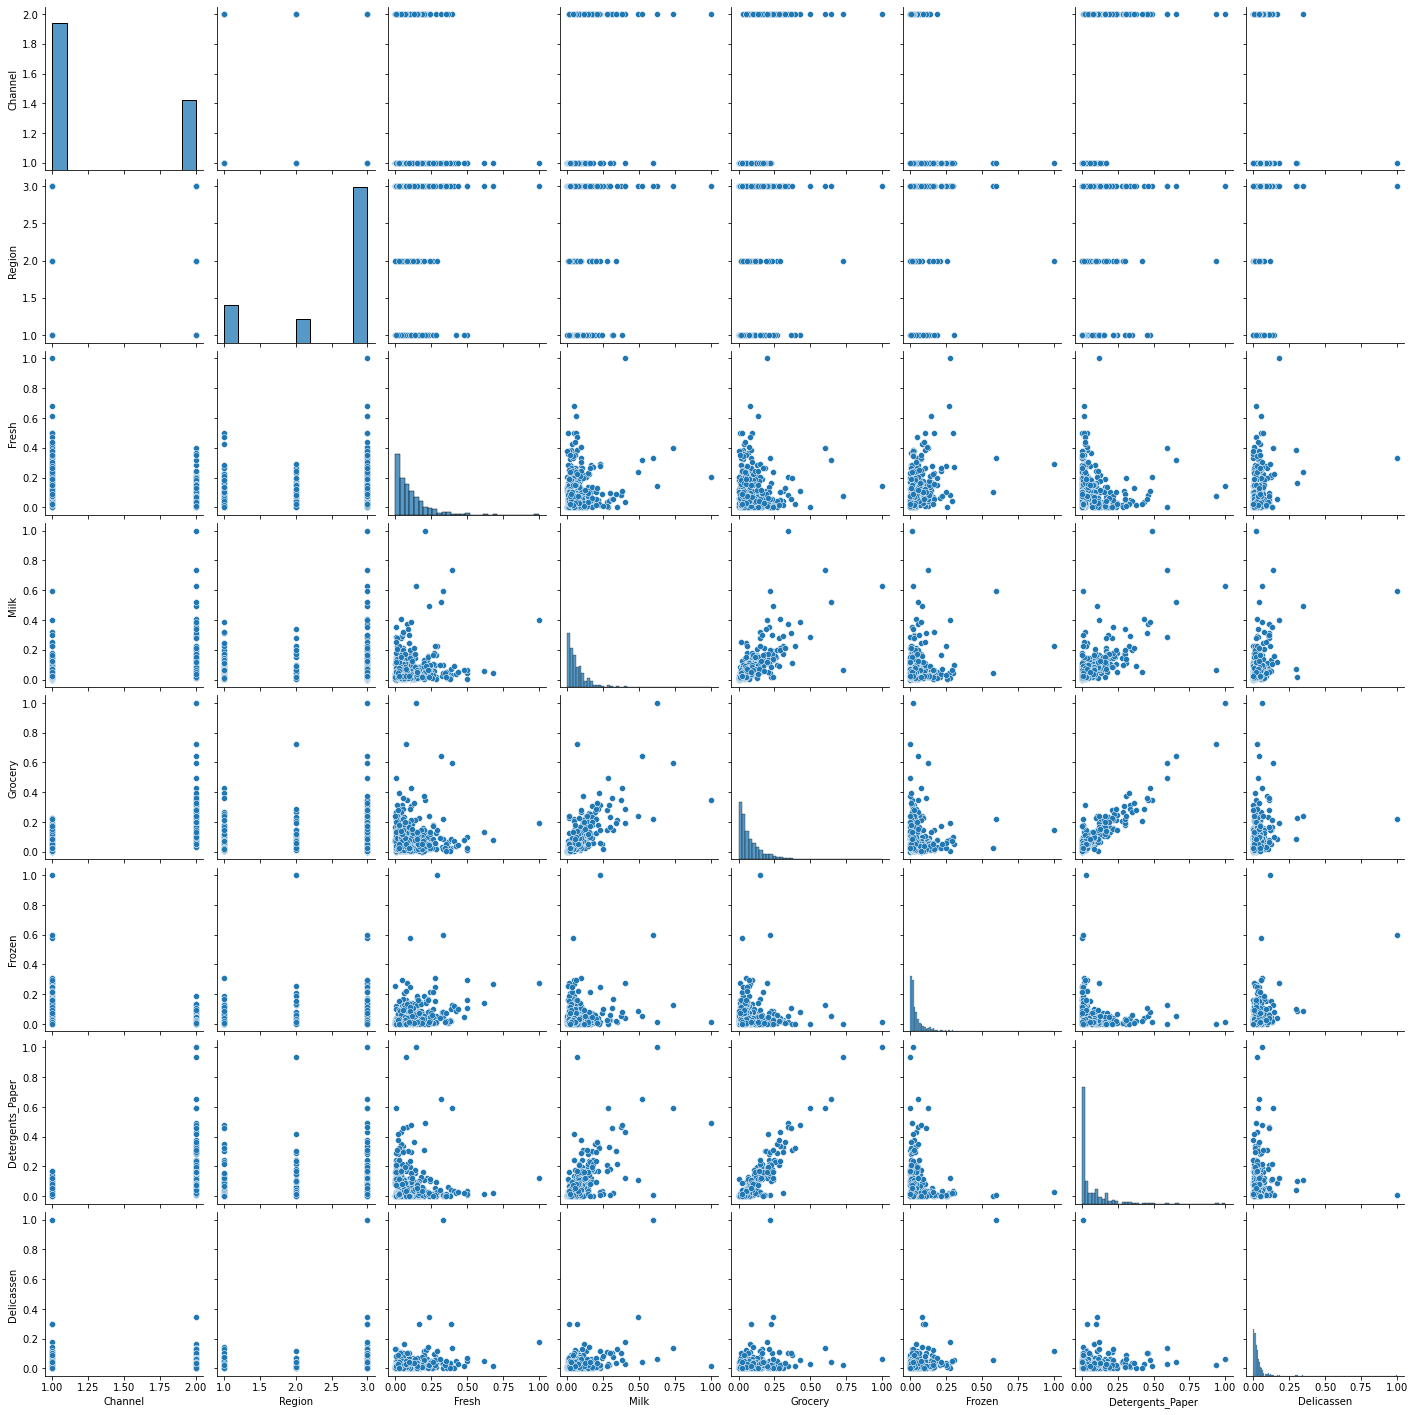

In [153]:
sns.pairplot(data)

C:\Users\docsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


384.2765172319383
150.1355158610279
72.12214145203752
46.278535674059256
28.67919447491958
19.418928179725288
15.67916418107215
13.12910080829588
11.738863843196066
10.659848501049458


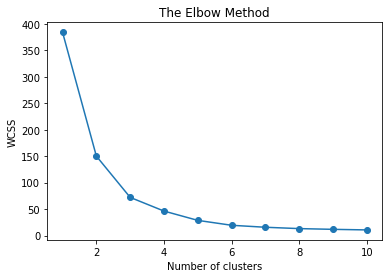

In [154]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11), wcss, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [155]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)

[0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 2 2 0 0 0 2 2 0 2 2 2 2 2 2 0 2
 0 0 2 2 2 0 0 0 0 0 0 0 0 2 2 0 0 2 2 0 0 2 2 0 0 0 0 2 0 2 0 2 2 2 2 2 0
 0 2 2 0 2 2 2 0 0 2 0 0 0 2 2 2 2 2 0 2 0 2 0 2 2 2 0 0 0 2 2 2 0 0 0 0 2
 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 0 0 2 0 0 0 2 2 0 0 0 0 2 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 2 2 2 0 2 2 1 3 1 1 3 3 1 1 1 3 1 3 1 3 1 3 1 1 3 1 3 1 3 1 1 1
 1 3 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 3 1 3 1 1 1 1 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 5 4 5
 4 5 5 4 5 5 5 5 5 5 5 4 4 5 4 4 5 4 4 5 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 5 4
 5 5 5 4 4 4 4 0 0 2 0 2 2 0 0 2 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 0 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 0 0 2 0 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2]


In [156]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

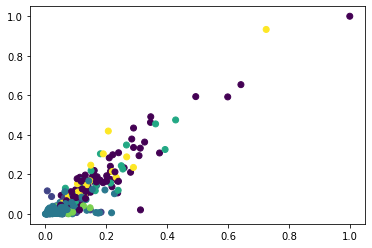

In [157]:
m = data['Grocery']
g = data['Detergents_Paper']
plt.scatter(m,g, c = y_kmeans)

In [158]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)

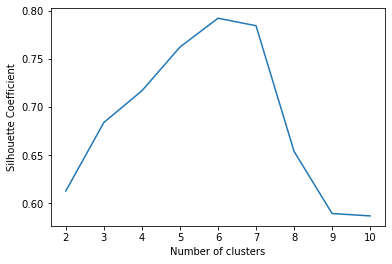

In [159]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Agglomerative Hierarchial Clustering

In [160]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
data = norm.fit_transform(data)

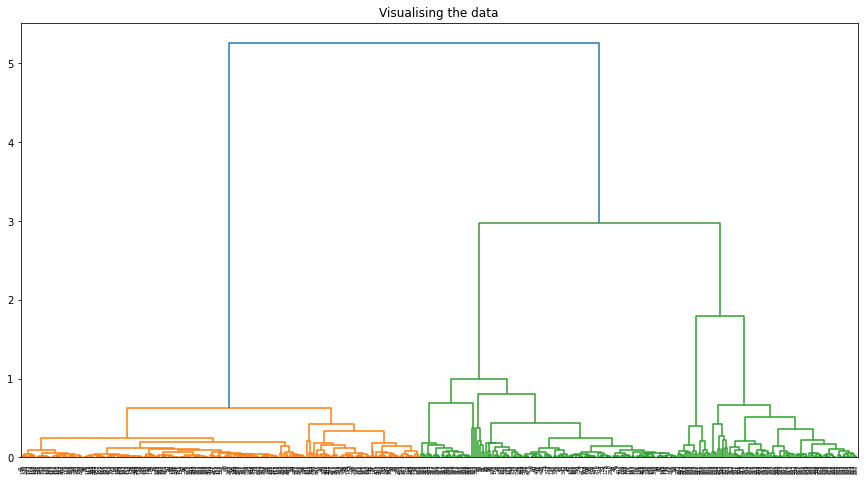

In [161]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data, method = 'ward')
plt.figure(figsize = (15,8))
plt.title('Visualising the data')
dendrogram(linked, orientation = 'top', distance_sort = 'ascending', show_leaf_counts = True)
plt.show()

In [162]:
ac2 = AgglomerativeClustering(n_clusters = 6)
ac2.fit(data)
pred_y = ac2.fit_predict(data)
print(pred_y)


[4 4 4 1 4 4 4 4 1 4 4 4 4 4 4 1 4 1 4 1 4 1 1 4 4 4 1 1 4 1 1 1 1 1 1 4 1
 4 4 1 1 1 4 4 4 4 4 5 4 4 1 1 4 4 1 1 4 4 1 1 4 5 4 4 1 4 1 4 1 1 1 1 1 4
 4 1 1 4 1 1 1 4 4 1 4 5 5 1 1 1 1 1 4 1 4 1 4 1 1 1 4 4 4 1 1 1 4 4 4 4 1
 4 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1
 1 1 1 1 1 1 1 4 4 1 4 4 4 1 1 4 4 4 4 1 1 1 4 4 1 4 1 4 1 1 1 1 1 1 1 0 1
 1 1 1 4 4 1 1 1 4 1 1 2 3 2 2 3 3 2 2 2 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2
 2 3 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 3 2 3 2 2 2 2 1 1 1 1 1 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1 2 0 2
 0 2 2 0 2 2 2 2 2 2 2 0 0 2 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0
 5 2 2 0 0 0 0 4 4 1 4 1 1 4 4 1 4 1 4 1 4 1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1
 4 1 1 4 1 1 4 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1
 4 4 1 1 1 1 1 1 4 4 1 4 1 1 4 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1]
